<a href="https://colab.research.google.com/github/csch7/Computational-Physics/blob/main/Homework-05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

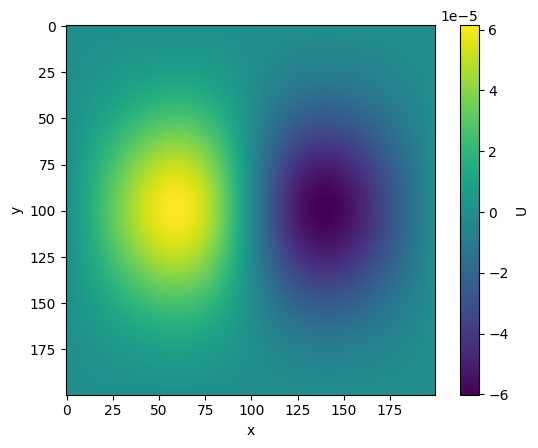

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def dipole(Niter, N):
  U = np.zeros((N,N))
  U[N//2, 2*N//5] = 1
  U[N//2, 3*N//5] = -1
  for n in range(Niter):
    for i in range(1, N-1):
      for j in range(1, N-1):
        U[i,j] = 0.25*(U[i-1,j]+U[i+1,j]+U[i,j-1]+U[i,j+1])
  return U

N = 200
Niter = 1500
U = dipole(Niter, N)

plt.imshow(U)
plt.colorbar(label='U')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
